In [3]:
# =========================================
# 1. Setup: Install packages and Kaggle API
# =========================================
!pip install -q kaggle scikit-learn xgboost

import os
from google.colab import files

# Upload kaggle.json
print("Upload your kaggle.json file (from https://www.kaggle.com/account)")
uploaded = files.upload()

# Move kaggle.json to the proper directory
os.makedirs('/root/.kaggle', exist_ok=True)
with open("/root/.kaggle/kaggle.json", "wb") as f:
    f.write(uploaded['kaggle.json'])

os.chmod("/root/.kaggle/kaggle.json", 600)

# =========================================

Upload your kaggle.json file (from https://www.kaggle.com/account)


Saving kaggle.json to kaggle.json


In [4]:
# 2. Download Dataset from Kaggle
# =========================================
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip -q creditcardfraud.zip -d data

# =========================================

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 763MB/s]


In [5]:
# 3. Import Libraries
# =========================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
import matplotlib.pyplot as plt

# =========================================

In [6]:
# 4. Load and Preprocess Data
# =========================================
df = pd.read_csv("data/creditcard.csv")

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================================


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8267    0.6327    0.7168        98

    accuracy                         0.9991     56962
   macro avg     0.9130    0.8162    0.8582     56962
weighted avg     0.9991    0.9991    0.9991     56962

Confusion Matrix:
 [[56851    13]
 [   36    62]]

Random Forest Evaluation:
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9405    0.8061    0.8681        98

    accuracy                         0.9996     56962
   macro avg     0.9701    0.9030    0.9340     56962
weighted avg     0.9996    0.9996    0.9996     56962

Confusion Matrix:
 [[56859     5]
 [   19    79]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:33:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Evaluation:
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9186    0.8061    0.8587        98

    accuracy                         0.9995     56962
   macro avg     0.9591    0.9030    0.9292     56962
weighted avg     0.9995    0.9995    0.9995     56962

Confusion Matrix:
 [[56857     7]
 [   19    79]]


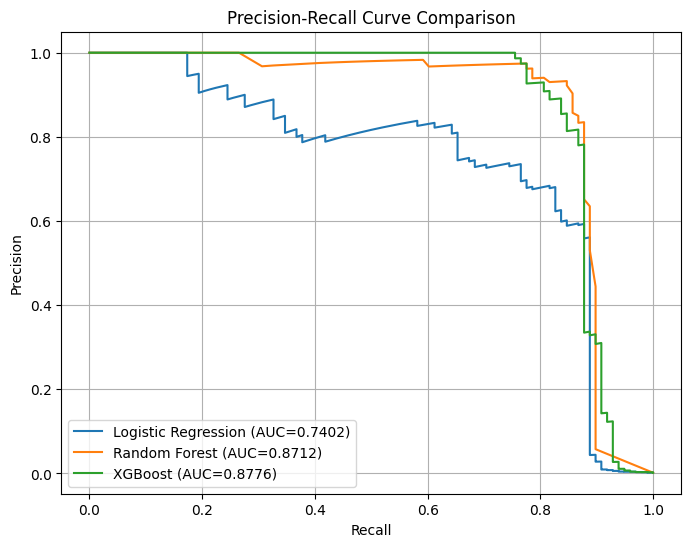

In [9]:
# =========================================
# 5. Train Models and Compare PR Curves
# =========================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train, evaluate, and store PR data
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f"\n{name} Evaluation:")

    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_scores = model.predict_proba(X_test_scaled)[:, 1]

    # Print classification report
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    # Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)

    # Plot
    plt.plot(recall, precision, label=f'{name} (AUC={pr_auc:.4f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()
